# Titanic


Here I will analysing the Titanic disaster, using Python, including Pandas, NumPy, Sci-kit Learn libraries.
Dataset was takken from Kaggle competition, you can find it by following the link 'https://www.kaggle.com/c/titanic/overview'
According the data discription, collumns SibSp contains value of of siblings / spouses aboard the Titanic, parch contains value of parents / children aboard the Titanic. The Embarked column discibes the Port of Embarkation. At first sight, I`m not sure that place, where you come aboard the ship, can impact your safety. 

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = pd.read_csv('./train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S


In [12]:
data.shape

(891, 12)

In [13]:
counts_nans = pd.DataFrame(data.isna().sum(), columns=['NaNs'])
percent_nans = pd.DataFrame(((data.isna().mean()) * 100), columns=['percent of total'])
percent_of_nans_data = pd.concat([counts_nans, percent_nans], axis=1)

In [14]:
percent_of_nans_data

,NaNs,percent of total
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [15]:
data.drop(columns='Cabin' ,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
ce_data = data.copy()   # containing embarked feature data

In [17]:
ce_data.drop(columns=['Embarked', 'PassengerId'], inplace=True)
ce_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [18]:
data['Embarked'].fillna('S', inplace=True)

# Sex

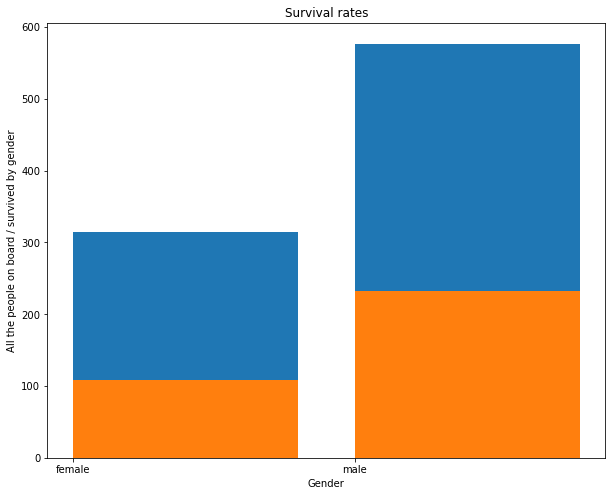

In [19]:
plt.figure(figsize=(10, 8))
rect1 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'].value_counts(sort=False), align='edge')
rect2 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'][data['Survived'] == 1].value_counts(sort=False), align='edge')
plt.ylabel('All the people on board / survived by gender')
plt.xlabel('Gender')
plt.title('Survival rates')
plt.show()